In [1]:
from ddrnet_23_slim import DualResNet as DualResNet_tens
from DDRNet_23_slim_official import DualResNet_imagenet_off
from pretrained_model_mapping import set_weight
from comparison_test import test
import torch
import numpy as np
import keras
import tensorflow as tf
from comparison_test import test

In [2]:
net = DualResNet_imagenet_off(pretrained=True)
weight_net = net.state_dict()
torch_model = net.eval()

In [3]:
model= DualResNet_tens((224, 224, 3), 3, 19, comparison_test=True)
set_weight(model, path='DDRNet23s_imagenet.pth', 
           test=True, random_weight=weight_net)

In [4]:
torch_model = torch_model.eval()
  
torch_inputs = torch.Tensor(np.random.rand(3, 3, 224, 224))

tf_inputs = np.transpose(torch_inputs.numpy(), (0, 2, 3, 1))
with torch.no_grad():
    torch_output = torch_model(torch_inputs)

tf_output = model.predict(tf_inputs)

In [7]:
res = []
for i in range(16):

        res.append(test(torch_output, tf_output, i))

Max difference in conv1 is :8.344650268554688e-07 and avg is: 4.667001363145573e-08
Max difference in layer1 is :2.205371856689453e-06 and avg is: 2.2077107075801905e-07
Max difference in layer2 is :3.0994415283203125e-06 and avg is: 2.6852509904529143e-07
Max difference in layer3 is :2.6673078536987305e-06 and avg is: 2.0302159953189403e-07
Max difference in layer3_ is :4.023313522338867e-06 and avg is: 4.412904957007413e-07
Max difference in down3 is :3.069639205932617e-06 and avg is: 1.400932774231478e-07
Max difference in copression3 is :4.291534423828125e-06 and avg is: 3.81513984848425e-07
Max difference in layer4 is :3.069639205932617e-06 and avg is: 2.8606498858607665e-07
Max difference in layer4_ is :5.4836273193359375e-06 and avg is: 5.333071726454364e-07
Max difference in down4 is :2.041459083557129e-06 and avg is: 1.5110937567897054e-07
Max difference in compression4 is :5.9604644775390625e-06 and avg is: 4.781316533808422e-07
Max difference in layer5_ is :3.695487976074218

In [9]:
net.final_layer

segmenthead(
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 19, kernel_size=(1, 1), stride=(1, 1))
)

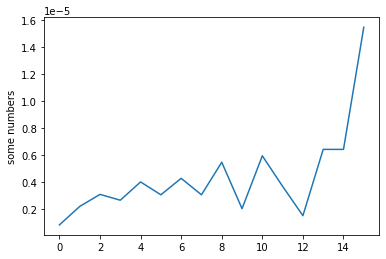

In [8]:
import matplotlib.pyplot as plt
plt.plot(res)
plt.ylabel('some numbers')
plt.show()